In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import pandas as pd

import wave
import librosa
from pydub import AudioSegment
from pydub.playback import play

D:\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
D:\Anaconda3\lib\site-packages\pydub\utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


## fetch data

In [2]:
DATA_FOLDER = "audibles"
CURRENT_DIR = os.getcwd()
FOLDER_PATH = os.path.join(CURRENT_DIR, DATA_FOLDER)
AUDIBLES = ['Daniel.wav', 'good-afternoon.wav', 'Jakub.wav', 
           'LudvigElevator.wav', 'Richard.wav', 'good-morning_lei.wav']
EXPORT_FOLDER = "segments"
print(FOLDER_PATH)

C:\Users\xianl_pmrkzzf\SpeechRecognition\Speaker-Identification\audibles


In [60]:
def fetch_voice_data(url, folder): 
    audios = []
    for audio in os.listdir(url):
        if audio.endswith('.wav'):
            audios.append(os.path.join(audio))
    return audios

audibles = fetch_voice_data(FOLDER_PATH, DATA_FOLDER)
print(audibles)

['Daniel.wav', 'good-afternoon.wav', 'good-morning_lei.wav', 'Jakub.wav', 'LudvigElevator.wav', 'Richard.wav']


In [93]:
## this part is to help another notebook
url = 'C:/Users/xianl_pmrkzzf/Desktop/Kaggle-audio-tagging/audio_test/'
test = fetch_voice_data(url, 'audio_test')
len(test)


import csv

def save_csv(file_name, files):
    with open(file_name, mode='w') as csv_file:
        header = ['fname', 'label']
        csv_writer = csv.DictWriter(csv_file, fieldnames=header)

        csv_writer.writeheader()
        if len(files) > 0:
            for ele in files:
                csv_writer.writerow({'fname': ele, 'label': ele.split('.')[0]})
        else:
            print("nothing to write to csv.")

#save_file('sample_submission.csv', 'Laughter Hi-Hat Flute', test)
#save_csv('audibles_csv', audibles)

In [4]:
def get_audibles(folder=DATA_FOLDER, audios=AUDIBLES):
    audibles = []
    for ele in audios:
        path = os.path.join(folder, ele) 
        audibles.append(path)
    return audibles

In [5]:
def get_audio_stats(audio):
    wav = wave.open(audio)
    print(f"channels: {wav.getnchannels()}")
    print(f"sample rate: {wav.getframerate()}")
    print(f"frames: {wav.getnframes()}")
    print(f"sample width: {wav.getsampwidth()}")
    print(f"duration: {wav.getnframes()/wav.getframerate()}")


In [6]:
get_audio_stats(audibles[1])

channels: 2
sample rate: 48000
frames: 166144
sample width: 2
duration: 3.461333333333333


## using pydub AudioSegment

In [7]:
def get_audios_stats(audios):
    for audio in audios:
        signal = AudioSegment.from_file(audio)  
        channels = signal.channels
        sample_rate = signal.frame_rate
        sample_width = signal.sample_width
        length_ms = len(signal)
        frame_width = signal.frame_width
        print(f'{audio}\nchannels: {channels}, sample_rate: {sample_rate}, \
        \nsample_width: {sample_width}, length: {length_ms}, frame_width: {frame_width}\n')

In [8]:
get_audios_stats(audibles)

audibles\Daniel.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 97003, frame_width: 4

audibles\good-afternoon.wav
channels: 2, sample_rate: 48000,         
sample_width: 2, length: 3461, frame_width: 4

audibles\good-morning_lei.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 1347, frame_width: 4

audibles\Jakub.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 77530, frame_width: 4

audibles\LudvigElevator.wav
channels: 2, sample_rate: 48000,         
sample_width: 2, length: 63104, frame_width: 4

audibles\Richard.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 101829, frame_width: 4



In [26]:
def fetch_data(url=FOLDER_PATH, folder=EXPORT_FOLDER): 
    audios = []
    for audio in os.listdir(url):
        if audio.endswith('.wav'):
            audios.append(os.path.join(folder, audio))
    return audios

audibles_1s = fetch_data()
print(audibles_1s)
get_audios_stats(audibles_1s)

['segments\\Daniel.wav', 'segments\\good-afternoon.wav', 'segments\\good-morning_lei.wav', 'segments\\Jakub.wav', 'segments\\LudvigElevator.wav', 'segments\\Richard.wav']
segments\Daniel.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1000, frame_width: 2

segments\good-afternoon.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1000, frame_width: 2

segments\good-morning_lei.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1000, frame_width: 2

segments\Jakub.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1000, frame_width: 2

segments\LudvigElevator.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1000, frame_width: 2

segments\Richard.wav
channels: 1, sample_rate: 44100,         
sample_width: 2, length: 1000, frame_width: 2



## visulize some data for observing

In [23]:
from scipy.io import wavfile

def plot_audio_frames(file): 
    rate, data = wavfile.read(file)
    print(rate)
    print(data.shape)
    plt.plot(data, '-')
    plt.figure(figsize=(16, 4))
    plt.plot(data[:100], '.'); 
    plt.plot(data[:100], '-');

## pre-processing data by using Librosa

In [ ]:
## change the sample rate and channels of all audios to the same 
## add label of names
## chunk each audio to 0.01s
## each 0.01s is an array
## each audio is a dataframe

def transform_audios(audios=audibles):
    audios_df = []
    for audio in audibles:
        samples, sample_rate = librosa.load(audio, sr=44100, mono=True, duration=1.0, dtype=np.float32)
#        print(samples.shape)
        samples_2d = samples.reshape(100, 441)
        name = os.path.split(audio)[1].split('.')[0]
        label = np.full((100,), name)
        samples_df = pd.DataFrame(samples_2d)
        samples_df[len(samples_df.columns)] = label
        audios_df.append(samples_df)
    return audios_df

In [33]:
audios_df = transform_audios()
audios_df[2].describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.004775,-0.005716,-0.006335,-0.006707,-0.006954,-0.007303,-0.007846,-0.008564,-0.009276,-0.009933,...,-0.001376,-0.001921,-0.001901,-0.001546,-0.001156,-0.000998,-0.001173,-0.001723,-0.002602,-0.003667
std,0.085317,0.084348,0.083554,0.083674,0.084558,0.085553,0.086263,0.086061,0.084972,0.083638,...,0.079169,0.076796,0.076347,0.077784,0.080212,0.082878,0.085005,0.086252,0.086763,0.086294
min,-0.188705,-0.182770,-0.177628,-0.192566,-0.206787,-0.214355,-0.216690,-0.214417,-0.218506,-0.212189,...,-0.253723,-0.249146,-0.241196,-0.231369,-0.221191,-0.211990,-0.204147,-0.200699,-0.197525,-0.195740
25%,-0.044109,-0.043716,-0.048439,-0.048958,-0.047333,-0.046513,-0.042828,-0.044197,-0.041023,-0.040638,...,-0.032791,-0.031242,-0.032646,-0.030590,-0.032440,-0.032753,-0.036926,-0.039444,-0.040081,-0.042049
50%,-0.004776,-0.005455,-0.004753,-0.006126,-0.005470,-0.004662,-0.003601,-0.003685,-0.004242,-0.003891,...,0.000000,-0.000496,-0.000679,-0.000549,-0.001205,-0.001640,-0.001541,-0.001747,-0.003654,-0.003517
75%,0.016636,0.016167,0.016697,0.015640,0.020966,0.020630,0.018604,0.018734,0.016541,0.014942,...,0.026497,0.030643,0.030548,0.030178,0.029682,0.027382,0.025505,0.021877,0.018867,0.016937
max,0.345306,0.337860,0.323730,0.307098,0.290131,0.274490,0.268250,0.281998,0.289673,0.292496,...,0.269440,0.238861,0.226257,0.245255,0.265701,0.287186,0.307632,0.325150,0.338898,0.345856


In [38]:
audios_df[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 442 entries, 0 to 441
dtypes: float32(441), object(1)
memory usage: 173.2+ KB


## experiment area

In [12]:
x = np.array([])
zz = np.arange(15).reshape(3, 5)
print(zz)
df = pd.DataFrame(zz)
df


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [13]:
df.head()
z = np.arange(3)
z
df[len(df.columns)] = z
df

,0,1,2,3,4,5
0,0,1,2,3,4,0
1,5,6,7,8,9,1
2,10,11,12,13,14,2


## using pydub AudioSegment

In [21]:
def trim_audios_1s(audios=audibles):
    audibles_1s = []
    for ele in audios:
        audio = AudioSegment.from_file(ele) 
        audio_seg = audio[:1000]
        if audio_seg.channels != 1:
            audio_seg = audio_seg.set_channels(1)
        if audio_seg.frame_rate != 44100:
            audio_seg = audio_seg.set_frame_rate(44100) 
        audibles_1s.append(audio_seg)
        audio_name = os.path.split(ele)[1]
        export_fname = os.path.join(EXPORT_FOLDER, audio_name)
        print(export_fname)
        audio_seg.export(out_f=export_fname, format='wav')
    return audibles_1s

In [22]:
# get the 1s of the selected audios
audibles_1s = trim_audios_1s()

        
    

segments\Daniel.wav
segments\good-afternoon.wav
segments\good-morning_lei.wav
segments\Jakub.wav
segments\LudvigElevator.wav
segments\Richard.wav


<class 'pydub.audio_segment.AudioSegment'>
44100
(44100,)


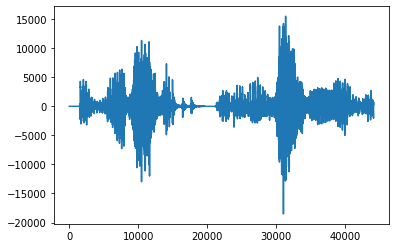

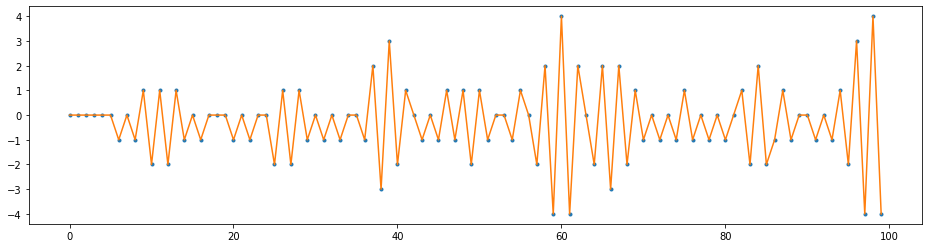

In [25]:
print(type(audibles_1s[2]))

audio_1s = os.path.join(EXPORT_FOLDER, 'Daniel.wav')
plot_audio_frames(audio_1s)


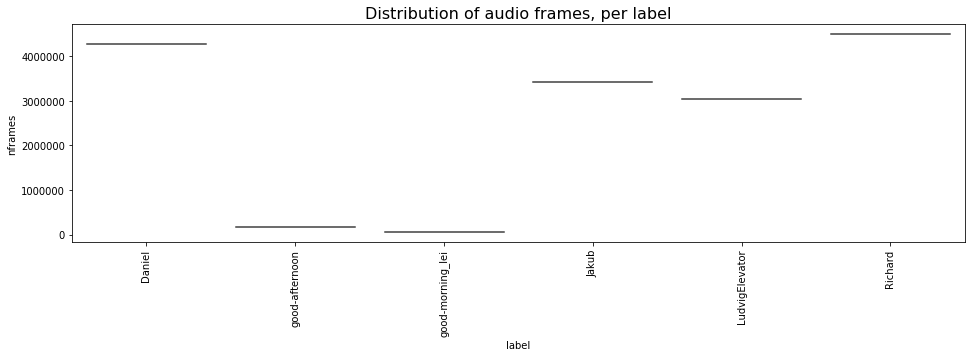

In [105]:

import seaborn as sns

audibles_csv = pd.read_csv('audibles_csv')
audibles_csv['nframes'] = audibles_csv['fname'].apply(lambda f: wave.open('audibles/' + f).getnframes())

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="label", y="nframes", data=audibles_csv)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()

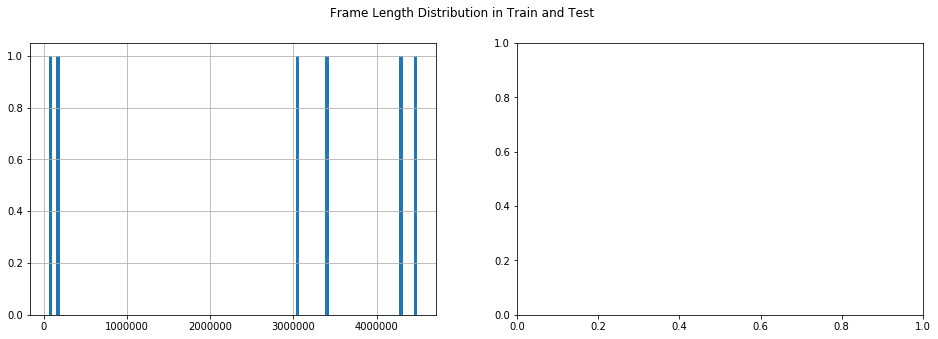

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
audibles_csv.nframes.hist(bins=100, ax=axes[0])
#test.nframes.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

In [104]:
au = audibles_1s[0].set_sample_width(1)
play(au)


AttributeError: 'str' object has no attribute 'set_sample_width'

In [ ]:
audibles_1s[0].channels

In [ ]:
## using pydub

def get_file_stats(file_name):
    audio_segment = AudioSegment.from_file(file_name)
    
    channels = audio_segment.channels
    sample_width = audio_segment.sample_width
    sample_rate = audio_segment.frame_rate
    frame_width = audio_segment.frame_width
    length_ms = len(audio_segment)
    
    audio_stats = [file_name, channels, sample_width, sample_rate,
                           frame_width, length_ms]
    
    print(file_name)
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")

    return audio_stats

In [ ]:
audio_stats = get_file_stats(audios[0])
audio_stats

In [ ]:
def process_audio(audios):
    for audio in audios:
        print(audio)
        audio_c = AudioSegment.from_file(audio)
        sample = audio_c[500:1500]
        play(sample)
        sleep(1)
#        audio_stats = get_file_stats(audio_c)

In [ ]:
process_audio(audios)


## enumerate example

In [ ]:
labels = ["a", "b", "c"]

In [ ]:
label_x = {label: i for i, label in enumerate(labels)}

In [ ]:
label_x

## using Librosa to calculate mfcc

In [52]:
SAMPLE_RATE = 44100
fname = "segments/good-afternoon.wav"
wav, _ = librosa.core.load(fname, sr=SAMPLE_RATE)
#wav = wav[:2*48000]

In [53]:
mfcc = librosa.feature.mfcc(wav, sr=SAMPLE_RATE, n_mfcc=40)
mfcc.shape

(40, 87)

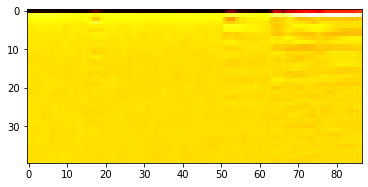

In [54]:
plt.imshow(mfcc, cmap='hot', interpolation='nearest')

In [43]:
def get_mfcc(file_name, sample_rate):
    SAMPLE_RATE = 48000
    wav, _ = librosa.core.load(file_name, sr=sample_rate)
## don't know if this should be include and why
    #wav = wav[:2*48000]
    mfcc = librosa.feature.mfcc(wav, sr=SAMPLE_RATE, n_mfcc=40)
    print(f"'{file_name}' has mfcc {mfcc.shape}")
    return mfcc

In [44]:
get_mfcc(fname, SAMPLE_RATE)

'segments/Daniel.wav' has mfcc (40, 87)


array([[-7.54746900e+02, -7.55069036e+02, -3.95814534e+02, ...,
        -3.51693628e+02, -3.03820355e+02, -2.93148795e+02],
       [-8.81625023e-01, -6.41698755e-01,  1.90553415e+02, ...,
         1.74722322e+02,  1.69687789e+02,  1.82963266e+02],
       [ 1.62233610e+00,  1.17044670e+00, -4.38758236e+01, ...,
        -4.20520072e+01, -3.46275280e+01, -2.17756684e+01],
       ...,
       [ 4.25559249e-01,  3.28931185e-01, -1.77771327e+00, ...,
        -4.08063437e+00, -4.81619820e-01, -2.99578787e+00],
       [ 2.48478922e-01,  1.45986202e-01,  8.67889362e-01, ...,
         2.41577330e-01, -2.28262815e-01, -2.76760120e+00],
       [ 4.12925717e-01,  3.31872447e-01, -1.42126276e+00, ...,
        -4.55604248e-01,  3.14754257e+00,  1.28964462e+00]])

In [107]:
import tensorflow as tf

In [108]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y +2

In [115]:
with tf.compat.v1.Session() as sess:
    sess.run(x.initializer)
    sess.run(y.initializer)
    result = sess.run(f)
    print(result)

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [112]:
print(tf.__version__)

2.0.0


In [116]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0
